In [ ]:
!pip install torch torchvision diffusers transformers
!pip install flask_ngrok flask 
!pip install pyngrok==4.1.1
!pip install flask_cors
!ngrok authtoken 1pDdjhcWhyh8VUFRTYCnGgCOI8g_3f56gBgxvREzT4gfAWXp2
!pip install opencv-python matplotlib
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'
!pip install controlnet-aux==0.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 852.0/852.0 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15979 sha256=2c4b7609e2440344821b20349fa97b417412cf09295f1d31e97bd5199da5aa98
  Stored in directory: /root/.cache/pip/wheels/89/2d/c2/abe6bcfde6bce368c00ecd73310c11edb672c3eda09a090cfa
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Authtoken saved to configuration file:

In [ ]:
import requests
import torch
import torchvision
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import cv2
import numpy as np

from diffusers import StableDiffusionImg2ImgPipeline, StableDiffusionDepth2ImgPipeline, StableDiffusionControlNetPipeline, ControlNetModel
from diffusers import UniPCMultistepScheduler

from controlnet_aux import LineartDetector, PidiNetDetector, HEDdetector, NormalBaeDetector

from transformers import pipeline



device = "cuda"
# model_id_or_path = "OFA-Sys/small-stable-diffusion-v0"
# model_id_or_path = "stabilityai/stable-diffusion-2-1-base"
model_id_or_path = "stabilityai/stable-diffusion-2-1-base"
model_id_or_path_depth = "stabilityai/stable-diffusion-2-depth"
pipe_sd2 = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe_sd2 = pipe_sd2.to(device)
pipe_sd2.scheduler = UniPCMultistepScheduler.from_config(pipe_sd2.scheduler.config)

pipe_sd2_depth = StableDiffusionDepth2ImgPipeline.from_pretrained(model_id_or_path_depth, torch_dtype=torch.float16)
pipe_sd2_depth = pipe_sd2_depth.to(device)
pipe_sd2_depth.scheduler = UniPCMultistepScheduler.from_config(pipe_sd2_depth.scheduler.config)

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_canny", torch_dtype = torch.float16)
canny_controlnet = canny_controlnet.to(device)
normal_controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_normalbae", torch_dtype = torch.float16)
normal_controlnet = normal_controlnet.to(device)
scribble_controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_scribble", torch_dtype = torch.float16)
scribble_controlnet = scribble_controlnet.to(device)
lineart_controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_lineart", torch_dtype = torch.float16)
lineart_controlnet = lineart_controlnet.to(device)
depth_controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype = torch.float16)
depth_controlnet = depth_controlnet.to(device)
pipe_sd1_5_controlnet = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)
pipe_sd1_5_controlnet.scheduler = UniPCMultistepScheduler.from_config(pipe_sd1_5_controlnet.scheduler.config)
pipe_sd1_5_controlnet = pipe_sd1_5_controlnet.to(device)

scribbleExtractor = HEDdetector.from_pretrained('lllyasviel/Annotators')
lineartExtractor = LineartDetector.from_pretrained("lllyasviel/Annotators")
normalExtractor = NormalBaeDetector.from_pretrained("lllyasviel/Annotators")
depth_estimator = pipeline('depth-estimation')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Loading base model ()...Done.
Removing last two layers (global_pool & classifier).


In [ ]:
!nvidia-smi

Sun Apr 23 04:34:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    55W / 400W |  14839MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
def preprocess(image):
    
    w, h = image.size
    print(w,h)
    if w < h:
      h = int(h*(512/w))
      w = 512
    else:
      w = int(w*(512/h))
      h = 512
    w, h = map(lambda x: x - x % 64, (w, h))  # resize to integer multiple of 64, 32 can sometimes result in tensor mismatch errors
    image = image.resize((w, h), resample=Image.LANCZOS)

    canvas = Image.new("RGBA", image.size, "WHITE")
    canvas.paste(image, (0,0), image)
    return_image = canvas
    return_image = return_image.convert('RGB')

    
    
    return return_image, image

In [ ]:
def get_background_points(ori_image, gen_image):
  ori_np = np.array(ori_image)
  gen_np = np.array(gen_image)

  ori_mask = ori_np[:,:,3]==0
  gen_mask = np.all(gen_np>(230,230,230), axis=2)
  desired_pixels = np.argwhere(ori_mask & gen_mask)

  return desired_pixels

def get_foreground_points(ori_image, gen_image):
  ori_np = np.array(ori_image)
  gen_np = np.array(gen_image)

  ori_mask = ori_np[:,:,3]!=0
  gen_mask = np.all(gen_np!=[255,255,255], axis=2)
  desired_pixels = np.argwhere(ori_mask & gen_mask)

  return desired_pixels

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def get_randomly_sampled_points(points, n):
  sampled_rows = np.random.choice(points.shape[0], size=n, replace=False)
  return points[sampled_rows, :]

def get_maximal_diversity_points(points, n):
    kmeans = KMeans(n_clusters=n, init='k-means++').fit(points)
    distances = cdist(points, kmeans.cluster_centers_, 'euclidean')
    max_distances = np.min(distances, axis=1)
    indices = np.argsort(max_distances)[::-1][:n]
    return points[indices]

In [ ]:
# ori_image = Image.open('ttt.png')
# init_image, ori_image = preprocess(ori_image)
# images = pipe(prompt='a red baseball, high quality, 4k, photograph', negative_prompt='low quality, ugly', image=init_image, strength=0.8, guidance_scale=12, num_inference_steps=16).images
from datetime import datetime
def calc_mask(ori_image, images, N=50):
  
  t = datetime.now()
  foreground_points = get_randomly_sampled_points(get_foreground_points(ori_image, images[0]), N)
  background_points = get_background_points(ori_image, images[0])
  background_points = get_randomly_sampled_points(background_points, N)


  point_labels = [1]*N+[0]*N
  # point_coords = np.concatenate([foreground_points])
  point_coords = np.concatenate([foreground_points, background_points])
  point_coords[:, [1,0]] = point_coords[:, [0,1]]
  cv2_image = cv2.cvtColor(np.array(images[0]), cv2.COLOR_RGB2BGR)
  predictor.set_image(cv2_image)
  masks, scores, _ = predictor.predict(
      point_coords=point_coords,
      point_labels=point_labels,
  )
  idx = np.argmax(scores)
  # print(scores, idx)
  mask = masks[idx]

  image = Image.fromarray(cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB))
  alpha_channel = np.where(mask == False, 0, 255).astype('uint8')
  image.putalpha(Image.fromarray(alpha_channel))

  # plt.figure(figsize=(10,10))
  # plt.imshow(cv2_image)
  # show_mask(mask, plt.gca())
  # show_points(point_coords, point_labels, plt.gca())
  # plt.axis('off')
  # plt.show()  
  
  return image

# print(datetime.now()-t)


In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [ ]:
def handle_prompts(prompts, prompt_weights):
  if len(prompts)==1 and len(prompt_weights)==0:
    return prompts[0]
  elif len(prompts)>1 or len(prompt_weights)==1:
    text_input = pipe.tokenizer(prompts, padding="max_length", max_length=pipe.tokenizer.model_max_length, truncation=True, return_tensors="pt")
    with torch.no_grad():
      text_embeddings = pipe.text_encoder(text_input.input_ids.to(device))[0]

    if len(prompt_weights) <=1:
      text_embeddings = torch.mean(text_embeddings, dim=0)
    elif len(prompt_weights) > 1:
      prompt_weights = torch.Tensor(prompt_weights).to(device)
      text_embeddings = torch.sum(text_embeddings * prompt_weights[:, None, None], dim=0)/torch.sum(prompt_weights)

    return torch.reshape(text_embeddings, (1, text_embeddings.shape[0], text_embeddings.shape[1]))


In [ ]:
def cannyExtractor(init_image, low_threshold=100, high_threshold=200):
  init_image = cv2.Canny(np.asarray(init_image), low_threshold, high_threshold)
  init_image = init_image[:, :, None]
  init_image = np.concatenate([init_image, init_image, init_image], axis=2)
  init_image = Image.fromarray(init_image)
  # init_image.show()
  return init_image

def depthExtractor(init_image, low_threshold=100, high_threshold=200):
  init_image = depth_estimator(init_image)['depth']
  init_image = np.array(init_image)
  init_image = init_image[:, :, None]
  init_image = np.concatenate([init_image, init_image, init_image], axis=2)
  init_image = Image.fromarray(init_image)
  # init_image.show()
  return init_image

In [ ]:
import os
import threading
import base64
from io import BytesIO
from flask import Flask, request, jsonify, send_file
import json
from flask_ngrok import run_with_ngrok
from flask import Response, Request
from flask_cors import CORS, cross_origin


app = Flask(__name__)
app.config['CORS_HEADERS'] = 'Content-Type'
run_with_ngrok(app)
# CORS(app)
CORS(app, resources={r"/*": {"origins": "*"}})
from flask import Response

@app.before_request
def basic_authentication():
  print(request.method)
  if request.method.lower() == 'options':
    return Response()

# @app.after_request
# def after_request(response):
#   response.headers.add('Access-Control-Allow-Origin', '*')
#   response.headers.add('Access-Control-Allow-Headers', 'Content-Type,Authorization')
#   response.headers.add('Access-Control-Allow-Methods', 'GET,PUT,POST,DELETE,OPTIONS')
#   response.headers.add('Access-Control-Allow-Credentials', 'true')
#   return response

def serve_pil_image(pil_img):
    img_io = BytesIO()
    pil_img.save(img_io, 'PNG', quality=70)
    img_io.seek(0)
    return send_file(img_io, mimetype='image/png')

# Define Flask routes
@app.route("/img2img", methods=['POST'])
@cross_origin()
def img2img():
    if request.method!='POST':
      return
    # print(request.method)
    d = json.loads(request.get_data())
    pipe = d['pipe']
    prompt = d['prompt']
    negative_prompt = d['negative_prompt']

    prompt_weights = d['prompt_weights']
    negative_prompt_weights = d['negative_prompt_weights']

    strength = d['strength']
    cfg = d['cfg']

    segment = d['segment']

    seed = None
    generator = None
    if 'seed' in d:
      seed = d['seed']
      generator = generator = torch.Generator(device='cuda', )
      generator.manual_seed(seed) 
    steps = d['steps']

    prompt = handle_prompts(prompt, prompt_weights)
    negative_prompt = handle_prompts(negative_prompt, negative_prompt_weights)

    
    ori_image = Image.open(BytesIO(base64.b64decode(d['init_img'].split(",",1)[1])))
    init_image, ori_image = preprocess(ori_image)

    print(prompt, negative_prompt, pipe)
    if pipe=='img2img':
      if len(prompt_weights)==0 and len(negative_prompt_weights)==0:
        images = pipe_sd2(prompt=prompt, negative_prompt=negative_prompt, image=init_image, strength=strength, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
      elif len(prompt_weights)!=0 and len(negative_prompt_weights)!=0:
        images = pipe_sd2(prompt_embeds=prompt, negative_prompt_embeds=negative_prompt, image=init_image, strength=strength, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
    elif pipe=='depth2img':
      if len(prompt_weights)==0 and len(negative_prompt_weights)==0:
        images = pipe_sd2_depth(prompt=prompt, negative_prompt=negative_prompt, image=init_image, strength=strength, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
      elif len(prompt_weights)!=0 and len(negative_prompt_weights)!=0:
        images = pipe_sd2_depth(prompt_embeds=prompt, negative_prompt_embeds=negative_prompt, image=init_image, strength=strength, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
    elif 'controlnet' in pipe:
      if 'canny' in pipe:
        control_image= cannyExtractor(init_image)
        pipe_sd1_5_controlnet.controlnet = canny_controlnet
      elif 'lineart' in pipe:
        control_image= lineartExtractor(init_image)
        pipe_sd1_5_controlnet.controlnet = lineart_controlnet
      elif 'scribble' in pipe:
        control_image= scribbleExtractor(init_image)
        pipe_sd1_5_controlnet.controlnet = scribble_controlnet
      elif 'normal' in pipe:
        control_image= normalExtractor(init_image)
        pipe_sd1_5_controlnet.controlnet = normal_controlnet
      elif 'depth' in pipe:
        control_image = depthExtractor(init_image)
        pipe_sd1_5_controlnet.controlnet = depth_controlnet

      if len(prompt_weights)==0 and len(negative_prompt_weights)==0:
        images = pipe_sd1_5_controlnet(prompt=prompt, negative_prompt=negative_prompt, image=control_image, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
      elif len(prompt_weights)!=0 and len(negative_prompt_weights)!=0:
        images = pipe_sd1_5_controlnet(prompt_embeds=prompt, negative_prompt_embeds=negative_prompt, image=control_image, guidance_scale=cfg, num_inference_steps=steps, generator=generator).images
    # get points... 

    if segment:
      return_image = calc_mask(ori_image, images)
    else:
      return_image = images[0]

    buffered = BytesIO()
    # images[0].show()
    return_image.save(buffered, format="PNG")
    
    output_img_send = base64.b64encode(buffered.getvalue())
    output_img_send = output_img_send.decode("utf-8")
    
    return jsonify({'img': 'data:image/png;base64,'+output_img_send})

@app.route("/test", methods=['GET'])
def test():

    return jsonify({'img': 'test'})
# Start the Flask server in a new thread
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://30d2-34-125-187-180.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:17] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:31] "POST /img2img HTTP/1.1" 200 -


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:37] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:49] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:55] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:28:57] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:17] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:29] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:37] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:29:57] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:03] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_depth


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:40] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:43] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:30:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:00] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:03] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:20] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:23] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:40] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:43] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a spinning glass cube on exploding fire, in matte textured 3d unreal rendering, 4k, in the white background deformed, ugly, boring, low resolution, lowres, blurry controlnet_normal


  0%|          | 0/50 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:31:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:32:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:32:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:32:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:32:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:33:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:34:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:35:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:36:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:37:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:38:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:39:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:40:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:35] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:41:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:42:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:43:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:44:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:45:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:46:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry depth2img


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:47:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:49:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:50:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:51:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:27] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:42] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:52:57] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:02] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:07] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:12] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:17] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:22] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:32] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:37] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:44] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_canny


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:53:52] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:45] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:55:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:25] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:56:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:57:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:01] "POST /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:58:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 05:59:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:00:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:01:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:02:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:03:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:44] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:47] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:49] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:54] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:56] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:04:59] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:04] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:06] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_lineart


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:05:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:07:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:36] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:41] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:46] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:51] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:56] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:08:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:01] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:06] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:11] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:16] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:21] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:26] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:31] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_normal


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:09:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:10:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:11:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:12:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:13:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:14:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:15:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:34] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:16:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:39] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:43] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:54] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:17:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:23] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:35] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:38] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:40] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:44] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:45] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:48] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:50] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:53] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:55] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:18:58] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:00] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:03] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:05] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:08] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:10] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:13] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:15] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:18] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:20] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:24] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:25] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:28] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:30] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:19:33] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:43] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:46] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:48] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:51] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:53] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:55] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:22:58] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:01] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:03] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:05] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:08] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:10] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:13] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:18] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:20] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:23] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:25] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:28] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:30] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:33] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:35] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:38] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:41] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:43] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_depth


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:23:45] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:09] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:11] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:14] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:16] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:19] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:21] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:24] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:26] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:29] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:31] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:34] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:36] "POST /img2img HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:39] "OPTIONS /img2img HTTP/1.1" 200 -


OPTIONS
POST
512 512
a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality low quality, blurry controlnet_scribble


  0%|          | 0/16 [00:00<?, ?it/s]

INFO:werkzeug:127.0.0.1 - - [23/Apr/2023 06:24:41] "POST /img2img HTTP/1.1" 200 -


In [ ]:
handle_prompts(['ues'], [1])

512 512


  0%|          | 0/16 [00:00<?, ?it/s]

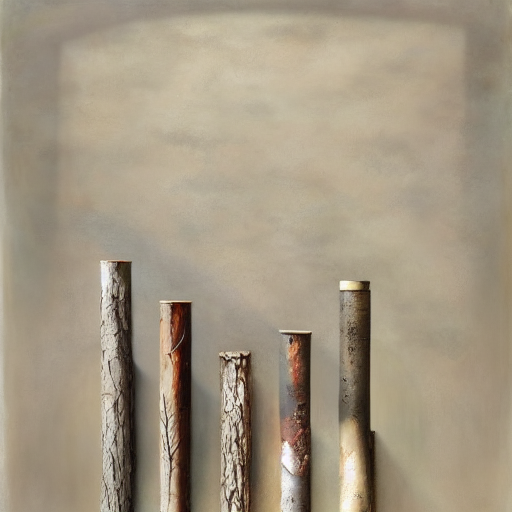

In [ ]:
init_image, ori_image = preprocess(Image.open('what.png'))
init_image= depthExtractor(init_image)

generator = generator = torch.Generator(device='cuda', )
generator.manual_seed(19) 
prompt = 'a series of long vertical tree trunks in grotesque oil painting in a white background, aesthetic, high quality'
negative_prompt = 'low quality, blurry'
images = pipe_sd1_5_controlnet(prompt=prompt, negative_prompt=negative_prompt, image=init_image, guidance_scale=12, num_inference_steps=16, generator=generator).images
images[0]

In [ ]:
init_image

In [ ]:
# return_image = calc_mask(ori_image, images, N=50)
# return_image
images[0]
pipe_sd1_5_controlnet.controlnet = depth_controlnet
# pipe_sd1_5_controlnet.controlnet = canny_controlnet

In [ ]:
!nvidia-smi

Sun Apr 23 04:44:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    54W / 400W |  16517MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------